# Workshop on Tensorflow
<img src = "https://upload.wikimedia.org/wikipedia/commons/2/2d/Tensorflow_logo.svg" align = "center">


## Importing dependencies

1. [Tensorflow](https://www.tensorflow.org/): Tensor operations
2. [Numpy](https://www.numpy.org/): Linear Algebra operations
3. [Matplotlib](https://matplotlib.org): Plotting
4. [OS](https://docs.python.org/3/library/os.html): Operating system functionality
5. [Pandas](https://pandas.pydata.org/): Data analysis
6. [tqdm](https://tqdm.github.io/): Generates progress bar

In [4]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd
from tqdm import tqdm_notebook

os.environ['CUDA_VISIBLE_DEVICES'] = "0"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

%matplotlib inline

## Verifying import
print("Tensorflow version =",tf.__version__)

## Verifying whether tensorflow is using Graphic Processing Unit
print("Using GPU" if tf.test.is_built_with_cuda() else "Not using GPU")

Tensorflow version = 1.10.0
Using GPU


## Hello, Tensorflow!

In [5]:
message = tf.constant("Hello, Tensorflow")
sess = tf.Session()
print(sess.run(message).decode())
sess.close()

Hello, Tensorflow


## Creating Constant Scalars
**Reminder** <br/>
Scalars are tensors with rank 0<br/>
Vectors are tensors with rank 1<br/>
Scalars are tensors with rank 2<br/>
Constants are assigned value at declaration and value cannot be reassigned



In [6]:
## constant variables 0 dimensional
x = tf.constant(2.0)
y = tf.constant(3.0)

## basic addition operation
z = x + y

## Creating and running a session
Computations are not run unless a tensorflow session is created <br/>
The graph is just static without a session<br/>
**Note: Do not forget to close session using tf.Session.close() to release hardware resources. <br/>
Failing to do so may lead to memory overflow**


In [7]:
## creating tensorflow session
sess = tf.Session()

## running the tensorflow session
print(sess.run(z))

## closing session
sess.close()

5.0


## Creating 1-D and 2-D tensor
It is also possible to convert numpy arrays and matrices to tensorflow tensors.<br/>
Which is demonstrated in the following example <br/>
In the following example a numpy function [np.eye](https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html) is used, which returns an identity matrix

In [8]:
## tensorflow vector from list
z_arr = tf.constant([1,2,3,4])

## tensorflow matrix from nested list
z_mat = tf.constant([[1,0],[0,1]])

## tensosrflow vector from numpy vector
z_arr_np = tf.constant(np.array([1,2,3,4]))

## tensorflow vector from numpy matrix
z_mat_np = tf.constant(np.eye(2))

sess = tf.Session()

print("z_arr =", sess.run(z_arr))
print("z_mat =", sess.run(z_mat))
print("z_arr_np =", sess.run(z_arr_np))
print("z_mat_np =", sess.run(z_mat_np))

sess.close()

z_arr = [1 2 3 4]
z_mat = [[1 0]
 [0 1]]
z_arr_np = [1 2 3 4]
z_mat_np = [[1. 0.]
 [0. 1.]]


## Creating placeholders

Placeholders do not need to be specified value at declaration, but are later fed value through feed dictionary <br/>
At declaration, we need to specify shape and data type <br/>
Similar to numpy, tensorflow tensors also have shape attribute

In [9]:
placeholder1 = tf.placeholder(dtype = tf.float32, shape = [1,2,3,4])
print(placeholder1.shape)

(1, 2, 3, 4)


In [10]:
inp = 50 * np.random.rand(50, 1)
out = 1.24 * inp + 21.23 + 6 * np.random.rand(50, 1)
print(inp.shape)
print(out.shape)

(50, 1)
(50, 1)


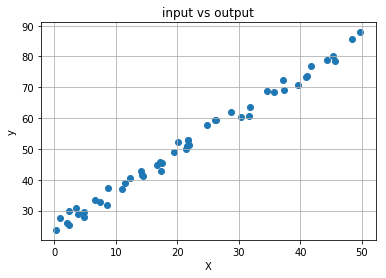

In [14]:
plt.scatter(inp, out)
plt.xlabel("X")
plt.ylabel("y")
plt.title("input vs output")
plt.grid(True)

In [18]:
X = tf.placeholder(dtype = tf.float32, shape = [None, 1])
y = tf.placeholder(dtype = tf.float32, shape = [None, 1])
W = tf.get_variable(dtype = tf.float32, name = "weight", shape = [1], initializer = tf.initializers.random_normal)
b = tf.get_variable(dtype = tf.float32, name = "bias", shape = [1], initializer = tf.initializers.random_normal)

In [19]:
def getPrediction(W, X, b):
    return X*W + b

In [20]:
def loss(W, X, y, b):
    pred = getPrediction(W, X, b)
    return tf.losses.mean_squared_error(pred, y)

In [21]:
cost = loss(W, X, y, b)
optimizer = tf.train.GradientDescentOptimizer(0.00001).minimize(cost)
init = tf.global_variables_initializer()
weights = {}
costCache = []


In [24]:
with tf.Session() as sess:
    sess.run(init)
    for num_iter in range(10**4):
        _, currentCost = sess.run([optimizer, cost], feed_dict = {X: inp, y: out})
        if num_iter % 1000 == 0:
            costCache.append(currentCost)
            print("Iteration = {}, Loss = {}".format(num_iter, currentCost))
    weights["weight"], weights["bias"] = W.eval(), b.eval()
    plt.plot(costCache)

SyntaxError: invalid syntax (<ipython-input-24-9d4299ca4ae6>, line 7)

In [ ]:
print(weights)

## Single layer perceptron with multiple features

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [1]:
x_train.shape

NameError: name 'x_train' is not defined

In [ ]:
X = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.float32, shape = [None, 10])


tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format("board"))
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, callbacks = [tensorboard])
model.evaluate(x_test, y_test)

In [ ]:
model.summary()